In [127]:
# Libraries and Dependencies

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt



In [128]:
# Read in all data for 2003 - 2023 and tommy john surgery list
# The loop also contains some data cleanup (remove last row, asign headers and index)
# This section is left as is just in case one needs to access a single years data.

start_year = 2003
end_year = 2023
folder_path = "./Resources/"

filtered_df = pd.DataFrame()

for year in range(start_year, end_year + 1):
    # Set filename within resources for pitcher stats
    filename = f"{year}_pitcher_stats.csv"
    # Set and join full file path within resources along with file name for reading csv
    file_path = os.path.join(folder_path,filename)
    try:
        # assigns each csv to a respective df for data cleanup
        variable_name = f"df_{year}"
        globals()[variable_name] = pd.read_csv(file_path, header = 1)
        # Delete last row of df as it does not contain relevant data
        globals()[variable_name] = globals()[variable_name].iloc[:-1]
        # Drop Rk in column if it exists
        if "Rk" in globals()[variable_name].columns:
            globals()[variable_name] = globals()[variable_name].drop(columns=["Rk","Name-additional"])
        # Assign column Name to index
        globals()[variable_name] = globals()[variable_name].set_index("Name")
        # Add column year associated to each pitcher stats for that correspond year file name
        globals()[variable_name].insert(0,"Year", year)
        # # Identify duplicate names for the current year
        # duplicate_names = globals()[variable_name].index[globals()[variable_name].index.duplicated(keep=False)]
        # # Identify rows wehre Tm = TOT for duplicate names
        # tot_rows_for_dupe_names = globals()[variable_name][(globals()[variable_name].index.isin(duplicate_names)) & (globals()[variable_name]["Tm"] == "TOT")]
        # # Filter current df to keep unique names and dupe names with tm=TOT
        # filtered_df = pd.concat([filtered_df,globals()[variable_name][~globals()[variable_name].index.isin(duplicate_names) & ((globals()[variable_name].index.isin(duplicate_names)) & (globals()[variable_name]["Tm"]=="TOT"))]])
        print(f"File {filename} successfully read.") 
    except FileNotFoundError:
        print(f"File {filename} not found.")


tommy_john_df = pd.read_csv("./Resources/tommy_john_list.csv",  header = 1)
tommy_john_df = tommy_john_df.set_index("Player")

File 2003_pitcher_stats.csv successfully read.
File 2004_pitcher_stats.csv successfully read.
File 2005_pitcher_stats.csv successfully read.
File 2006_pitcher_stats.csv successfully read.
File 2007_pitcher_stats.csv successfully read.
File 2008_pitcher_stats.csv successfully read.
File 2009_pitcher_stats.csv successfully read.
File 2010_pitcher_stats.csv successfully read.
File 2011_pitcher_stats.csv successfully read.
File 2012_pitcher_stats.csv successfully read.
File 2013_pitcher_stats.csv successfully read.
File 2014_pitcher_stats.csv successfully read.
File 2015_pitcher_stats.csv successfully read.
File 2016_pitcher_stats.csv successfully read.
File 2017_pitcher_stats.csv successfully read.
File 2018_pitcher_stats.csv successfully read.
File 2019_pitcher_stats.csv successfully read.
File 2020_pitcher_stats.csv successfully read.
File 2021_pitcher_stats.csv successfully read.
File 2022_pitcher_stats.csv successfully read.
File 2023_pitcher_stats.csv successfully read.


In [129]:
display(df_2003.head())
display(df_2003.tail())

,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
Name,,,,,,,,,,,,,,,,,,,,,
Paul Abbott,2003,35.0,KCR,AL,1,2,0.333,5.29,10,8,...,2,214,93.0,5.63,1.531,8.9,1.5,4.9,6.0,1.23
Jose Acevedo,2003,25.0,CIN,NL,2,0,1.000,2.67,5,4,...,1,103,156.0,3.55,0.852,5.7,1.0,2.0,7.7,3.83
Juan Acevedo,2003,33.0,TOT,AL,1,5,0.167,6.57,39,0,...,4,188,70.0,5.17,1.826,12.2,1.4,4.2,6.6,1.56
Juan Acevedo,2003,33.0,NYY,AL,0,3,0.000,7.71,25,0,...,2,125,58.0,5.49,1.714,11.9,1.8,3.5,6.7,1.90
Juan Acevedo,2003,33.0,TOR,AL,1,2,0.333,4.26,14,0,...,2,63,113.0,4.53,2.053,12.8,0.7,5.7,6.4,1.13


,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
Name,,,,,,,,,,,,,,,,,,,,,
Jason Young,2003,23.0,COL,NL,0,2,0.000,8.44,8,3,...,2,108,60.0,7.62,2.016,14.3,3.4,3.8,7.6,2.00
Carlos Zambrano,2003,22.0,CHC,NL,13,11,0.542,3.11,32,32,...,6,907,139.0,3.47,1.318,7.9,0.4,4.0,7.1,1.79
Víctor Zambrano,2003,27.0,TBD,AL,12,10,0.545,4.21,34,28,...,15,836,105.0,5.09,1.439,7.9,1.0,5.1,6.3,1.25
Chad Zerbe*,2003,31.0,SFG,NL,1,1,0.500,4.71,33,1,...,1,218,90.0,4.04,1.490,10.9,0.5,2.5,3.1,1.21
Barry Zito*,2003,25.0,OAK,AL,14,12,0.538,3.30,35,35,...,4,957,135.0,4.05,1.183,7.2,0.7,3.4,5.7,1.66


In [130]:
# Join all dataframes into one master_df for processing

# Create empty df
master_df = pd.DataFrame()

# Loop through the years and join dfs
for year in range(start_year, end_year + 1):
    variable_name = f"df_{year}"

    # Check if df exists before attempting to join
    if variable_name in globals():
        if master_df.empty:
            master_df = globals()[variable_name].copy()
        else:
            master_df = pd.concat([master_df,globals()[variable_name]],ignore_index=False)

# Quick review of master_df. will have repeating names.
# display(master_df.head())
# display(master_df.tail())

In [131]:
# Remove duplicate names for each year keeping only TOT
master_df = master_df.groupby('Year', group_keys=False, sort=False).apply(
    lambda group: group[~group.index.duplicated(keep=False) | ((group.index.duplicated(keep=False)) & (group['Tm'] == 'TOT'))]
)

# Fill nans with 0
master_df = master_df.fillna(0)

# Review data and confirm repeat names (greinke does in fact have 20 seasons under his belt)
# display(master_df.head())
# display(master_df.tail())
# name_counts = master_df.index.value_counts()
# print(name_counts)
#print(master_df.isna().sum())

In [132]:
display(tommy_john_df.head())

,TJ Surgery Date,Team,Level,Position,Throws,Country,High School,College(s),Age,Return Date (same level),...,IP,K-BB%,ERA-,FIP-,G.1,GS.1,IP.1,K-BB%.1,ERA-.1,FIP-.1
Player,,,,,,,,,,,,,,,,,,,,,
Endy Rodriguez,12/12/2023,PIT,MLB,C,R,Dominican,NaN,NaN,23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Johan Oviedo,12/1/2023,PIT,MLB,P,R,Cuba,NaN,NaN,25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jovani Moran,11/1/2023,MIN,AAA,P,L,Puerto Rico,NaN,NaN,26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taylor Broadway,10/18/2023,BOS,AA,P,R,United States,Texas,Mississippi,26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Felix Bautista,10/9/2023,BAL,MLB,P,R,Dominican,NaN,NaN,28,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# Data clean up of TJ surgery DF
# Keep only MLB and Pitchers
tommy_john_df = tommy_john_df[(tommy_john_df["Position"] == "P") & (tommy_john_df["Level"] == "MLB")]
# Keep year when TJ surgery was had
tommy_john_df = tommy_john_df[["Year","Month"]]
tommy_john_df["TJ Signal"] = 1
# Remove any years older than 2003
tommy_john_df = tommy_john_df[tommy_john_df["Year"] >= 2003]
tommy_john_df = tommy_john_df.rename_axis("Name")
# Check for duplicates in df and keep first instance
tommy_john_df = tommy_john_df[~tommy_john_df.index.duplicated(keep="first")]

display(tommy_john_df.head())
display(tommy_john_df.tail())
print(len(tommy_john_df))

,Year,Month,TJ Signal
Name,,,
Johan Oviedo,2023,12,1
Felix Bautista,2023,10,1
Sandy Alcantara,2023,10,1
Angel Perdomo,2023,10,1
Drey Jameson,2023,9,1


,Year,Month,TJ Signal
Name,,,
Ricky Bones,2003,5,1
A.J. Burnett,2003,4,1
Matt Wise,2003,3,1
Andy Ashby,2003,1,1
Jayson Durocher,2003,1,1


419


In [134]:
# Reset indices for df's to continue to adjust
master_df = master_df.reset_index(drop=False)
tommy_john_df = tommy_john_df.reset_index(drop=False)

# # Convert Names to lowercase
master_df['Name'] = master_df['Name'].str.lower()
master_df["Name"] = master_df["Name"].str.replace("*","")
tommy_john_df['Name'] = tommy_john_df['Name'].str.lower()

# # # Merge master_df and TJ_df based on the "Name" column
merged_df = pd.merge(master_df, tommy_john_df[['Name', 'Year', 'Month',"TJ Signal"]], on=['Name', 'Year'], how='left')

# # Create the "TJ Surgery" column and set values to 1 where there is data from TJ_df
merged_df['TJ Surgery'] = merged_df['TJ Signal'].notnull().astype(int)

# Remove month
merged_df = merged_df.drop(columns=["Month","TJ Signal"])

# Display the resulting DataFrame
#print(merged_df["TJ Surgery"].value_counts())
display(master_df.head())
display(master_df.tail())
display(tommy_john_df.head())
print(len(tommy_john_df))
display(merged_df.head())
print(merged_df["TJ Surgery"].value_counts())


,Name,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,paul abbott,2003,35.0,KCR,AL,1,2,0.333,5.29,10,...,2,214,93.0,5.63,1.531,8.9,1.5,4.9,6.0,1.23
1,jose acevedo,2003,25.0,CIN,NL,2,0,1.000,2.67,5,...,1,103,156.0,3.55,0.852,5.7,1.0,2.0,7.7,3.83
2,juan acevedo,2003,33.0,TOT,AL,1,5,0.167,6.57,39,...,4,188,70.0,5.17,1.826,12.2,1.4,4.2,6.6,1.56
3,terry adams,2003,30.0,PHI,NL,1,4,0.200,2.65,66,...,4,284,151.0,2.83,1.338,9.0,0.1,3.0,6.8,2.22
4,jon adkins,2003,25.0,CHW,AL,0,0,0.000,4.82,4,...,0,42,99.0,6.35,1.607,7.7,1.0,6.8,2.9,0.43


,Name,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
15041,rob zastryzny,2023,31.0,PIT,NL,1,0,1.0,4.79,21,...,2,97,94.0,4.32,1.790,10.5,0.4,5.7,6.5,1.15
15042,seby zavala,2023,29.0,ARI,NL,0,0,0.0,0.00,1,...,0,2,0.0,3.26,0.000,0.0,0.0,0.0,0.0,0.00
15043,angel zerpa,2023,23.0,KCR,AL,3,3,0.5,4.85,15,...,1,182,92.0,4.54,1.266,9.7,1.5,1.7,7.6,4.50
15044,bruce zimmermann,2023,28.0,BAL,AL,2,0,1.0,4.73,7,...,1,61,89.0,4.53,1.275,11.5,2.0,0.0,9.5,0.00
15045,guillermo zuñiga,2023,24.0,STL,NL,0,0,0.0,4.50,2,...,0,8,113.0,-0.75,1.000,9.0,0.0,0.0,18.0,0.00


,Name,Year,Month,TJ Signal
0,johan oviedo,2023,12,1
1,felix bautista,2023,10,1
2,sandy alcantara,2023,10,1
3,angel perdomo,2023,10,1
4,drey jameson,2023,9,1


419


,Name,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,TJ Surgery
0,paul abbott,2003,35.0,KCR,AL,1,2,0.333,5.29,10,...,214,93.0,5.63,1.531,8.9,1.5,4.9,6.0,1.23,0
1,jose acevedo,2003,25.0,CIN,NL,2,0,1.000,2.67,5,...,103,156.0,3.55,0.852,5.7,1.0,2.0,7.7,3.83,0
2,juan acevedo,2003,33.0,TOT,AL,1,5,0.167,6.57,39,...,188,70.0,5.17,1.826,12.2,1.4,4.2,6.6,1.56,0
3,terry adams,2003,30.0,PHI,NL,1,4,0.200,2.65,66,...,284,151.0,2.83,1.338,9.0,0.1,3.0,6.8,2.22,0
4,jon adkins,2003,25.0,CHW,AL,0,0,0.000,4.82,4,...,42,99.0,6.35,1.607,7.7,1.0,6.8,2.9,0.43,0


TJ Surgery
0    14812
1      234
Name: count, dtype: int64


In [135]:
merged_df = merged_df.drop(columns=["Tm","Lg"])
merged_df.set_index(["Name","Year"],inplace=True)
merged_df.sort_index(inplace=True)
# display(merged_df.head(60))
# display(merged_df.tail(60))


/Users/ebrown/anaconda3/envs/machine_learning/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Pithing Stat Correlation Study')

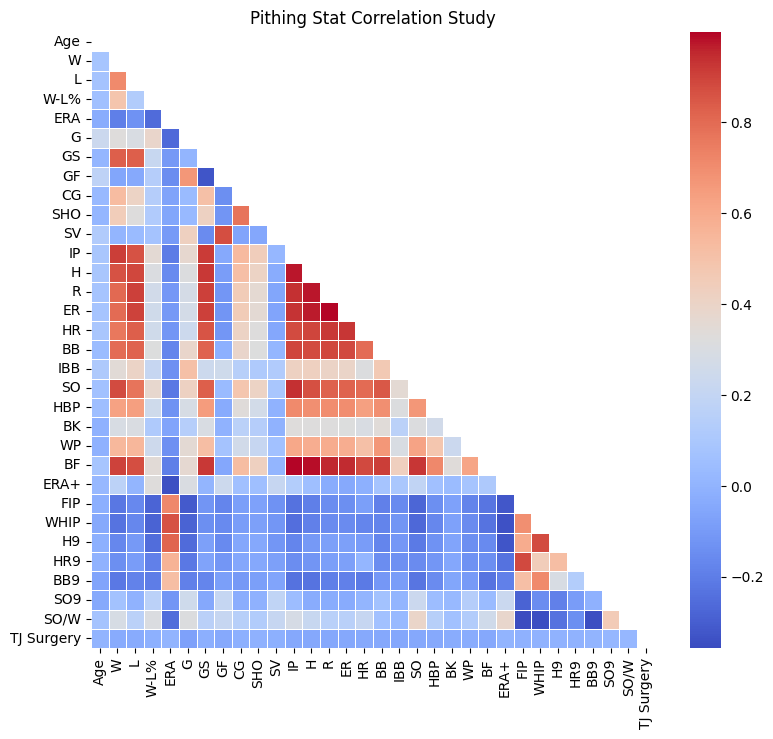

In [136]:
# Correlation Study
correlation = merged_df.apply(pd.Series).corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".1f", linewidths=.5, mask = mask)
plt.title('Pithing Stat Correlation Study')


In [137]:
# Start of machine model to. Features identified as general pitcher stats
# Target is binary and identified if pitcher has received TJ (1) or not (0)
# Note prediction in this instance is not timeseries dependend

# Import various libraries required for ML model

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [138]:
max_value = merged_df.max().max()  # Find the maximum value in the entire DataFrame
threshold = 1e6  # Set a threshold for large values

if max_value > threshold:
    print("DataFrame contains large values.")
else:
    print("DataFrame does not contain large values.")


DataFrame contains large values.


In [139]:
threshold = 1e6  # Set your threshold for large values

# Step 1: Identify Large Values
large_columns = merged_df.columns[merged_df.max() > threshold]
print("Columns with large values:", large_columns)

# Step 2: Locate Large Values
for column in large_columns:
    large_values = merged_df[merged_df[column] > threshold][column]
    print("Large values in", column, ":", large_values)

# Correct Large Values (Example: Clipping)
df_clipped = merged_df.copy()
for column in large_columns:
    df_clipped[column] = df_clipped[column].clip(upper=threshold)




Columns with large values: Index(['ERA'], dtype='object')
Large values in ERA : Name                 Year
andrew vasquez       2019    inf
bernardo flores jr.  2021    inf
daniel mccutchen     2012    inf
dennis tankersley    2003    inf
gerardo parra        2019    inf
jonathan stiever     2021    inf
lino urdaneta        2004    inf
matt koch            2017    inf
nate jones           2014    inf
nick greenwood       2015    inf
rex brothers         2018    inf
stephen tarpley      2021    inf
zack weiss           2018    inf
Name: ERA, dtype: float64


In [140]:
# prepare input data
# X is feature data and y is target data

# reset sub-index
df_clipped.reset_index(level="Year",inplace=True)

X = df_clipped.drop("TJ Surgery", axis = 1)
y = df_clipped["TJ Surgery"]

# split X to prepare for test/train functions
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=42)

In [141]:
# normalize all data for bayesian statistics

scaler = StandardScaler()

# fit training data to standard scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [142]:
# Define the parameter grid to search through
param_grid = {
    "penalty": ["l1","l2"],
    'C': [0.1, 1.0, 10.0],
    'solver': ['linlinear', 'saga', 'lbfgs']
}

# Create the Logistic Regression model
logistic = LogisticRegression()

# Create GridSearchCV
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV instance
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the model
test_score = best_model.score(X_test, y_test)


/Users/ebrown/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ebrown/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ebrown/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ebrown/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ebrown/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [143]:
# Make and save testing predictions with the saved logistic regression model using the test data
testing_predictions = grid_search.predict(X_test_scaled)


# Create and save the confustion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data

display(test_matrix)

/Users/ebrown/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[2315, 2120],
       [  41,   38]])

In [144]:
# Make and save training predictions with the saved logistic regression model using the train data
training_predictions = grid_search.predict(X_train_scaled)

# Create and save the confustion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data 

display(training_matrix)

/Users/ebrown/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[5433, 4944],
       [  89,   66]])

In [145]:
# Create and save the testing classifiction report
test_report = classification_report(y_test, testing_predictions)

# Print the training classification report
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.52      0.68      4435
           1       0.02      0.48      0.03        79

    accuracy                           0.52      4514
   macro avg       0.50      0.50      0.36      4514
weighted avg       0.97      0.52      0.67      4514



In [146]:
print("Best Parameters:", best_params)
print("Best Score (Cross-validation accuracy):", best_score)
print("Test Set Score:", test_score)


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Score (Cross-validation accuracy): 0.9852829464125146
Test Set Score: 0.9824988923349579


In [147]:
# Convert predicted probabilities to binary class labels (0 or 1) based on a threshold
threshold = 0.5  # You can adjust this threshold
binary_predictions_test = (testing_predictions > threshold).astype(int)

# Convert y_test to binary labels (0 or 1)
binary_y_test = ((y_test == 1) | (y_test == -1)).astype(int)

# Calculate binary classification metrics
accuracy = accuracy_score(binary_y_test, binary_predictions_test)
precision = precision_score(binary_y_test, binary_predictions_test)
recall = recall_score(binary_y_test, binary_predictions_test)
f1 = f1_score(binary_y_test, binary_predictions_test)
conf_matrix = confusion_matrix(binary_y_test, binary_predictions_test)

# Print the metrics
print(best_model)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

print('\nConfusion Matrix:')
print(conf_matrix)

LogisticRegression(C=0.1, penalty='l1', solver='saga')
Accuracy: 0.5212671688081524
Precision: 0.017608897126969416
Recall: 0.4810126582278481
F1 Score: 0.03397407241841753

Confusion Matrix:
[[2315 2120]
 [  41   38]]
